# Lending Club Analysis

### Analyze Lending Club's issued loans

In [40]:
# 필요할 패키지 import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas import DataFrame, Series

####  Raw Data 불러오기

In [41]:
data = pd.read_csv('C:\\Users\\Yi Geunik\\lending-club-loan-data\\loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## EDA(탐색적 데이터 분석)

In [42]:
data.shape ## data 크기 살펴보기 

(887379, 74)

In [43]:
data.head() ## 데이터 상태 확인

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data.columns ## 변수를 자세히 보자

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

__데이터 타입 살펴보기__

In [45]:
data.info() ## 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

__데이터 살펴보면서, 데이터 정리, missing value 처리, 데이터 관계 파악해야 함__
정제되지 않은 데이터라 너무 많은 변수가 섞여 있음.
- 변수 살펴보면서,
- 부도 여부 살펴볼 때, 관계가 없는 데이터 처리하고, 
- 데이터 타입 체크해서 변환하고,
- 특히 missing value 처리! critical하게 많은 변수의 경우 역시 배제


__변수에 대한 설명을 PT 표에 포함시킴__

### 일단 로데이터 수치형 변수/범주형 변수 기초통계량 체크하기

In [46]:
# 수치형 변수 확인하기
num_cols=[col for col in data.columns[:] if data[col].dtype in ['int64','float64']
]
data[num_cols].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [47]:
# 범주형 변수 확인하기
cat_cols = [col for col in data.columns[:] if data[col].dtype in ['O']]
data[cat_cols].describe() ##범주형 변수 확인하기

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299271,11,6,3,103,10,2,...,63144,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


### 즉 일단 로우 데이터 기준으로, 74개 변수 중에 51개가 수치형 변수 / 23개가 범주형 변수

In [48]:
#범주형 변수의 고유값 직접 확인해보면
for col in cat_cols:
    uniq = np.unique(data[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col,len(uniq),uniq))

--------------------------------------------------
# col term, n_uniq 2, uniq [' 36 months' ' 60 months']
--------------------------------------------------
# col grade, n_uniq 7, uniq ['A' 'B' 'C' 'D' 'E' 'F' 'G']
--------------------------------------------------
# col sub_grade, n_uniq 35, uniq ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']
--------------------------------------------------
# col emp_title, n_uniq 299272, uniq [' \tAdv Mtr Proj Fld Rep' '       NSA Industries llc'
 '    MOTHER  THERESA  HOME' ... 'zulily' 'Å\x9ar.  Technical Illustrator'
 '\u200bLicense Compliance Investigator']
--------------------------------------------------
# col emp_length, n_uniq 12, uniq ['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']
--------------------------------------------------
# col

--------------------------------------------------
# col purpose, n_uniq 14, uniq ['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
--------------------------------------------------
# col title, n_uniq 63145, uniq ['\tcredit_card' '\tdebt_consolidation' '\thouse' ...
 '~Life Reorganization~' '~Summer Fun~'
 'î\x81\x97î\x81\x97MY FIRST CAR î\x81\x97î\x81\x97']
--------------------------------------------------
# col zip_code, n_uniq 935, uniq ['007xx' '008xx' '010xx' '011xx' '012xx' '013xx' '014xx' '015xx' '016xx'
 '017xx' '018xx' '019xx' '020xx' '021xx' '022xx' '023xx' '024xx' '025xx'
 '026xx' '027xx' '028xx' '029xx' '030xx' '031xx' '032xx' '033xx' '034xx'
 '035xx' '036xx' '037xx' '038xx' '039xx' '040xx' '041xx' '042xx' '043xx'
 '044xx' '045xx' '046xx' '047xx' '048xx' '049xx' '050xx' '051xx' '052xx'
 '053xx' '054xx' '056xx' '057xx' '058xx' '059xx' '0

--------------------------------------------------
# col earliest_cr_line, n_uniq 698, uniq ['Apr-1955' 'Apr-1958' 'Apr-1960' 'Apr-1961' 'Apr-1962' 'Apr-1963'
 'Apr-1964' 'Apr-1965' 'Apr-1966' 'Apr-1967' 'Apr-1968' 'Apr-1969'
 'Apr-1970' 'Apr-1971' 'Apr-1972' 'Apr-1973' 'Apr-1974' 'Apr-1975'
 'Apr-1976' 'Apr-1977' 'Apr-1978' 'Apr-1979' 'Apr-1980' 'Apr-1981'
 'Apr-1982' 'Apr-1983' 'Apr-1984' 'Apr-1985' 'Apr-1986' 'Apr-1987'
 'Apr-1988' 'Apr-1989' 'Apr-1990' 'Apr-1991' 'Apr-1992' 'Apr-1993'
 'Apr-1994' 'Apr-1995' 'Apr-1996' 'Apr-1997' 'Apr-1998' 'Apr-1999'
 'Apr-2000' 'Apr-2001' 'Apr-2002' 'Apr-2003' 'Apr-2004' 'Apr-2005'
 'Apr-2006' 'Apr-2007' 'Apr-2008' 'Apr-2009' 'Apr-2010' 'Apr-2011'
 'Apr-2012' 'Aug-1946' 'Aug-1950' 'Aug-1951' 'Aug-1955' 'Aug-1958'
 'Aug-1959' 'Aug-1960' 'Aug-1961' 'Aug-1962' 'Aug-1963' 'Aug-1964'
 'Aug-1965' 'Aug-1966' 'Aug-1967' 'Aug-1968' 'Aug-1969' 'Aug-1970'
 'Aug-1971' 'Aug-1972' 'Aug-1973' 'Aug-1974' 'Aug-1975' 'Aug-1976'
 'Aug-1977' 'Aug-1978' 'Aug-1979' 'Au

--------------------------------------------------
# col next_pymnt_d, n_uniq 101, uniq ['Apr-2008' 'Apr-2009' 'Apr-2010' 'Apr-2011' 'Apr-2012' 'Apr-2013'
 'Apr-2014' 'Apr-2015' 'Aug-2008' 'Aug-2009' 'Aug-2010' 'Aug-2011'
 'Aug-2012' 'Aug-2013' 'Aug-2014' 'Aug-2015' 'Dec-2007' 'Dec-2008'
 'Dec-2009' 'Dec-2010' 'Dec-2011' 'Dec-2012' 'Dec-2013' 'Dec-2014'
 'Dec-2015' 'Feb-2008' 'Feb-2009' 'Feb-2010' 'Feb-2011' 'Feb-2012'
 'Feb-2013' 'Feb-2014' 'Feb-2015' 'Feb-2016' 'Jan-2008' 'Jan-2009'
 'Jan-2010' 'Jan-2011' 'Jan-2012' 'Jan-2013' 'Jan-2014' 'Jan-2015'
 'Jan-2016' 'Jul-2008' 'Jul-2009' 'Jul-2010' 'Jul-2011' 'Jul-2012'
 'Jul-2013' 'Jul-2014' 'Jul-2015' 'Jun-2008' 'Jun-2009' 'Jun-2010'
 'Jun-2011' 'Jun-2012' 'Jun-2013' 'Jun-2014' 'Jun-2015' 'Mar-2008'
 'Mar-2009' 'Mar-2010' 'Mar-2011' 'Mar-2012' 'Mar-2013' 'Mar-2014'
 'Mar-2015' 'Mar-2016' 'May-2008' 'May-2009' 'May-2010' 'May-2011'
 'May-2012' 'May-2013' 'May-2014' 'May-2015' 'Nov-2008' 'Nov-2009'
 'Nov-2010' 'Nov-2011' 'Nov-2012' 'Nov-20

## EDA Visualization&Data Processing

In [49]:
%matplotlib inline
mpl.rcdefaults()
mpl.rcParams.update({'font.size': 22})

<function matplotlib.pyplot.show(*args, **kw)>

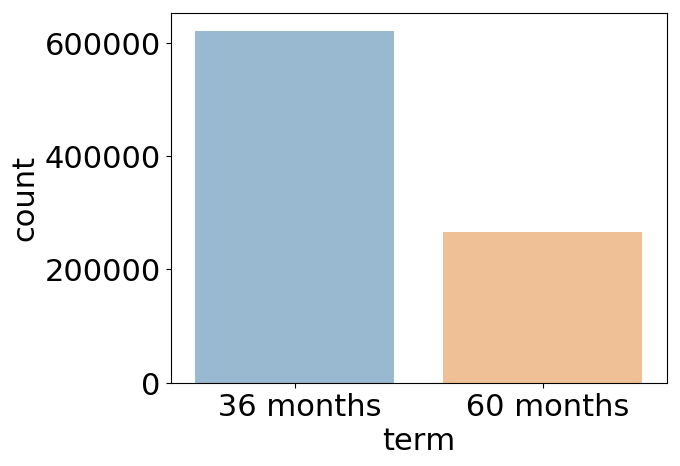

In [50]:
## term 분포 확인
sns.countplot(x=data['term'], data=data, alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

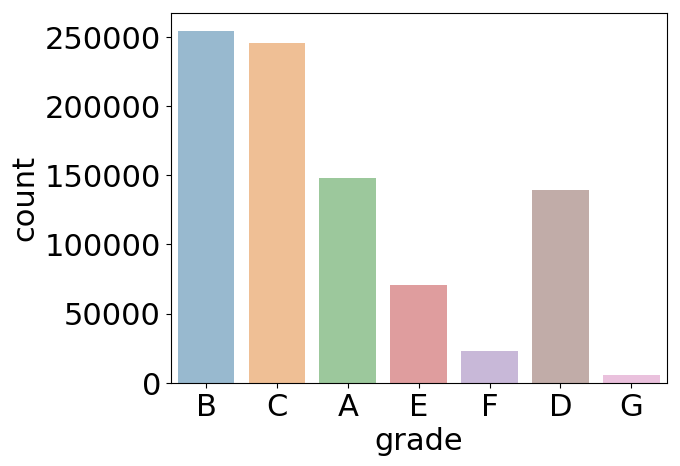

In [51]:
## grade 분포 확인(A-G)
sns.countplot(x=data['grade'], data=data, alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

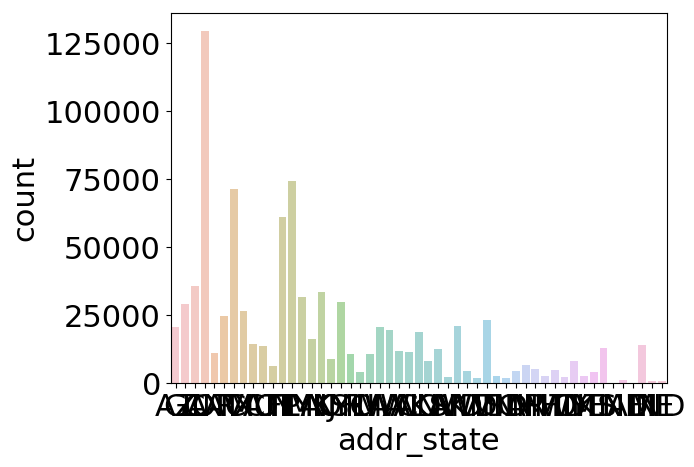

In [52]:
## state에 대해서
sns.countplot(x=data['addr_state'], data=data, alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

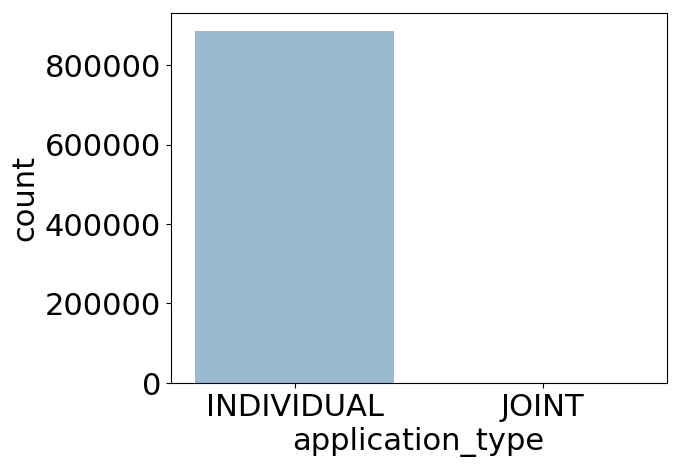

In [53]:
## application_type: 개인 or 그룹 신청인지
sns.countplot(x=data['application_type'], data=data, alpha=0.5)
plt.show

### 분석에 사용할 변수를 확인&drop

- term 변수는 추후 더미화할 것


__변수 drop__

1. id는 숫자지면 엄밀히는 식별번호일 뿐이므로 drop 
2. description에 불과한 변수 제거: 대출 신청 리스트의 url, title purpose 등... 
3. 데이터의 시점이 나와 있지 않으므로, 날짜와 관련된 데이터는 사용할 수 없으므로 drop
4. application_type은 individual이 대부분이기 때문에 분석에 실익 없으므로 drop
5. application_type은 individual와 joint인데 대부분이 individual level이므로 drop

#### 변수 간 상관계수 그리기 & 관계 살펴보기

In [54]:
#너무 많은 경우 느리게 돌아가므로 미리 돌리고자 하는 변수 선택
data_corr = pd.DataFrame(data, columns= ['loan_amnt','funded_amnt','funded_amnt_inv'])
corr = data_corr.corr(method = 'pearson')
print(corr)

                 loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.999263         0.997115
funded_amnt       0.999263     1.000000         0.998025
funded_amnt_inv   0.997115     0.998025         1.000000


__변수 drop__
6. loan_amnt, funded_amnt, funded_amnt_inv는 세 변수의 구별 의미가 없으므로 실제 대출 펀딩 금액인 'funded_amnt'만 분석하기

In [55]:
#실제로 파산한 사람들의 자료 보기 위해 파산한 사람들의 데이터를 따로 모아봄
data_default = data[data["loan_status"]=="Default"]
data_default

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
318,1062399,1294261,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7620,879297,1094167,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11759,809235,1016031,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13439,782572,985575,15975.0,15975.0,15975.000000,60 months,20.99,432.09,E,E5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13856,775378,977625,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17159,720788,915272,10000.0,10000.0,9975.000000,60 months,13.43,229.74,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18912,685965,875698,25975.0,25975.0,25854.183371,60 months,15.28,621.77,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21228,646957,827741,16000.0,16000.0,16000.000000,60 months,12.23,357.78,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23773,609371,781630,4200.0,4200.0,4200.000000,60 months,9.99,89.22,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46013,10144970,9378315,12000.0,12000.0,12000.000000,60 months,21.48,327.89,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,17000.0,NaN,NaN,NaN


In [56]:
#default한 사람들를 grade별로 정리, 한눈에 어디 grade에서 어느정도의 default가 일어났는지 확인
data_default.groupby([data_default.grade]).agg('count')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
grade,,,,,,,,,,,,,,,,,,,,,
A,47,47,47,47,47,47,47,47,47,42,...,0,0,0,0,0,0,47,0,0,0
B,198,198,198,198,198,198,198,198,198,185,...,0,0,0,0,0,0,197,0,0,0
C,360,360,360,360,360,360,360,360,360,337,...,0,0,0,0,0,0,354,0,0,0
D,312,312,312,312,312,312,312,312,312,294,...,0,0,0,0,0,0,308,0,0,0
E,201,201,201,201,201,201,201,201,201,185,...,0,0,0,0,0,0,197,0,0,0
F,79,79,79,79,79,79,79,79,79,76,...,0,0,0,0,0,0,76,0,0,0
G,22,22,22,22,22,22,22,22,22,21,...,0,0,0,0,0,0,22,0,0,0


#### crosstab으로 데이터 살펴보기

In [57]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[loan_grade[0]], data[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43


In [58]:
#비율로 살펴보기
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[purp_loan[0]], data[purp_loan[1]]).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,,
car,0.0505472,0.557035,0.00112829,0.00146677,0.00575426,0.360826,0.00451314,0.00913912,0.00169243,0.007898
credit_card,0.0379568,0.726712,0.00113007,0.000334656,0.00131437,0.204916,0.0055776,0.0100445,0.00184788,0.0101658
debt_consolidation,0.0526482,0.679567,0.00150702,0.000557023,0.00154135,0.230371,0.00762664,0.00914892,0.0028805,0.0141526
educational,0.132388,0.00236407,0,0.0756501,0.153664,0.635934,0,0,0,0
home_improvement,0.0437786,0.674912,0.000906828,0.00136989,0.00275907,0.244265,0.00708098,0.00951205,0.00264331,0.0127728
house,0.0771513,0.500135,0.00188832,0.00296736,0.00890208,0.368492,0.00998112,0.00998112,0.0040464,0.0164554
major_purchase,0.0505875,0.596631,0.000810326,0.00133125,0.00578804,0.312033,0.00723505,0.01065,0.0029519,0.0119812
medical,0.0666276,0.623419,0.00175644,0.00257611,0.00421546,0.267564,0.00655738,0.0106557,0.00199063,0.014637
moving,0.0785002,0.576468,0.00203177,0.00277059,0.0057259,0.296084,0.00794237,0.00960473,0.00424825,0.0166236


Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Text(0.5, 1.0, 'Loan Status Count')

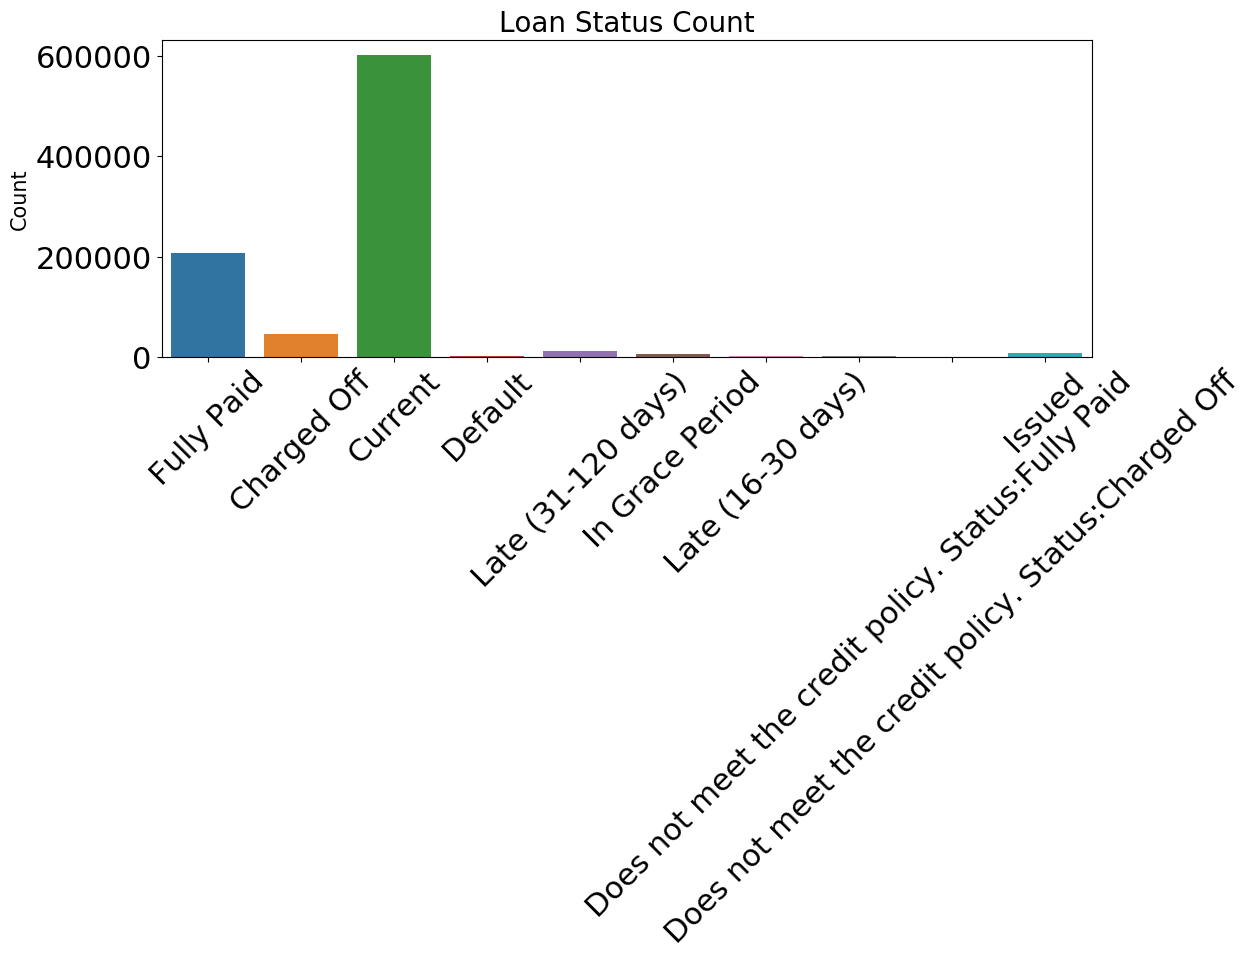

In [59]:
## data 도식으로 확인
print(data.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

__변수 drop__
7. grade 역시 loan status와 지나치게 상관성이 높으므로 drop. 앞의 분포를 살펴보면 사실상 B에 거의 몰려 있음. 이미 대출 허가 시점에서 B에 내생성이 있기 때문 
8. sub_grade는 세부등급이므로 grade를 drop하면서 함께 제거

__Critical한 Missing Value 값 갖고 있는 변수 제거__
9. 21개 변수 drop 

desc, mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog, annual_inc_joint, dti_joint,
verified_status_joint, open_acc_6m, open_il_6m, open_il_12m,
open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m
,open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl,inq_last_12m

### 분석에 사용할 변수 추출

In [60]:
data = data[['member_id', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 
                     'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 
                     'last_pymnt_amnt']]

### 종속변수: loan_status  변수 더미화

In [61]:
# 의미없는 분류에 속한 "does not meet the credit policy"의 값을 가진 경우 드랍
i = len(data)
data = pd.DataFrame(data[data['loan_status'] != "Does not meet the credit policy. Status:Fully Paid"])
data = pd.DataFrame(data[data['loan_status'] != "Does not meet the credit policy. Status:Charged Off"])
a = len(data)
print(f"We dropped {i-a} rows, a {((i-a)/((a+i)/2))*100}% reduction in rows")

We dropped 2749 rows, a 0.3102693045012751% reduction in rows


In [62]:
# 대출의 상환 상태에 대하여 Bad인 상태와 Good인 상태를 나눔
# 다 갚은 상태인 Fully Paid와 잘 갚고 있는 상태인 Current를 0
# 그 이외의 default, charged off(체납 상태) 등의 좋지 않은 상환 상태를 1로. 
data['loan_status_dummy_1'] = (data['loan_status'] == 'Current')*1
data['loan_status_dummy_2'] = (data['loan_status'] == 'Fully Paid')*1
data['loan_status_dummy_3'] = data['loan_status_dummy_2']+data['loan_status_dummy_1']
data['loan_status_dummy'] = (data['loan_status_dummy_3'] == 0)*1
data = data.drop(columns=['loan_status_dummy_1', 'loan_status_dummy_2', 'loan_status_dummy_3'])

### home_ownership 변수 더미화

In [63]:
# lending club에 따르면 home_ownership은 4가지 카테고리: (1) MORTGATE, (2) OWN, (3) RENT, (4) OTHER로 분류하고 있음. 
# NONE과 ANY의 경우는 결측치와 마찬가지이므로, 드랍하기
data=data.drop(data[data.home_ownership=="NONE"].index)
data=data.drop(data[data.home_ownership=="ANY"].index)

In [64]:
dummy_frame = pd.get_dummies(data['home_ownership'])
data = data.join(dummy_frame.add_prefix('home_ownership_'))

### term 변수 더미화

In [65]:
dummy_frame = pd.get_dummies(data['term'])
data = data.join(dummy_frame.add_prefix('term_'))

In [66]:
data = data.drop(columns=['home_ownership', 'term'])

#### 결측치 제거

In [67]:
data = data.dropna() 

### 분석에 사용할 변수 확인

In [68]:
data.columns

Index(['member_id', 'funded_amnt', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'last_pymnt_amnt', 'loan_status_dummy',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'term_ 36 months', 'term_ 60 months'],
      dtype='object')

### 주요 변수인 em_length_years(재직 기간) 데이터 타입 변환 

In [69]:
data['emp_length_years'] = data['emp_length'].str.replace('+', '', 
                               regex=True).replace('<','',
                                                   regex=True).replace(' ', '', 
                                                                       regex=True).replace('s', '',
                                                                                           regex=True).replace('year','',
                                                                                                               regex=True).astype(float)
data['emp_length_years'].head()

0    10.0
1     1.0
2    10.0
3    10.0
4     1.0
Name: emp_length_years, dtype: float64

### 변수 추가적으로 확인하기 - correlation 체크

In [70]:
# 상관관계 체크
data.corr()

,member_id,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,last_pymnt_amnt,loan_status_dummy,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months,emp_length_years
member_id,1.000000,0.068350,-0.141705,0.026758,0.037780,0.133371,0.051356,-0.116726,0.080724,-0.230263,-0.125085,-0.008183,-0.018265,0.035990,-0.012554,-0.070763,0.070763,0.012142
funded_amnt,0.068350,1.000000,0.150268,0.945102,0.324762,0.046622,-0.002512,-0.028741,-0.075251,0.226272,0.008507,0.188757,-0.005442,-0.012697,-0.184642,-0.407384,0.407384,0.105943
int_rate,-0.141705,0.150268,1.000000,0.136869,-0.072882,0.162940,0.055338,0.233272,0.052963,0.102998,0.162034,-0.061034,-0.000340,0.003239,0.060273,-0.433736,0.433736,0.009324
installment,0.026758,0.945102,0.136869,1.000000,0.319239,0.030570,0.005555,0.002763,-0.064610,0.236353,0.018304,0.155784,-0.003328,-0.009473,-0.153016,-0.138950,0.138950,0.090039
annual_inc,0.037780,0.324762,-0.072882,0.319239,1.000000,-0.177885,0.045813,0.036834,-0.002524,0.086979,-0.029841,0.152366,-0.001529,-0.023080,-0.141501,-0.051630,0.051630,0.063689
dti,0.133371,0.046622,0.162940,0.030570,-0.177885,1.000000,-0.008311,-0.012444,-0.048632,-0.058784,0.027377,-0.008413,-0.006181,0.029141,-0.008571,-0.111427,0.111427,0.042926
delinq_2yrs,0.051356,-0.002512,0.055338,0.005555,0.045813,-0.008311,1.000000,0.022645,-0.009682,-0.020716,0.004198,0.048279,-0.000401,-0.001310,-0.048403,0.002278,-0.002278,0.025302
inq_last_6mths,-0.116726,-0.028741,0.233272,0.002763,0.036834,-0.012444,0.022645,1.000000,0.060649,0.063317,0.068648,0.035710,0.003649,-0.000519,-0.036174,0.000991,-0.000991,-0.006242
pub_rec,0.080724,-0.075251,0.052963,-0.064610,-0.002524,-0.048632,-0.009682,0.060649,1.000000,-0.032573,-0.009374,-0.005676,-0.003613,0.002840,0.004193,0.021538,-0.021538,0.031537
last_pymnt_amnt,-0.230263,0.226272,0.102998,0.236353,0.086979,-0.058784,-0.020716,0.063317,-0.032573,1.000000,-0.111402,0.069253,-0.000603,-0.010851,-0.064103,-0.069196,0.069196,0.028220


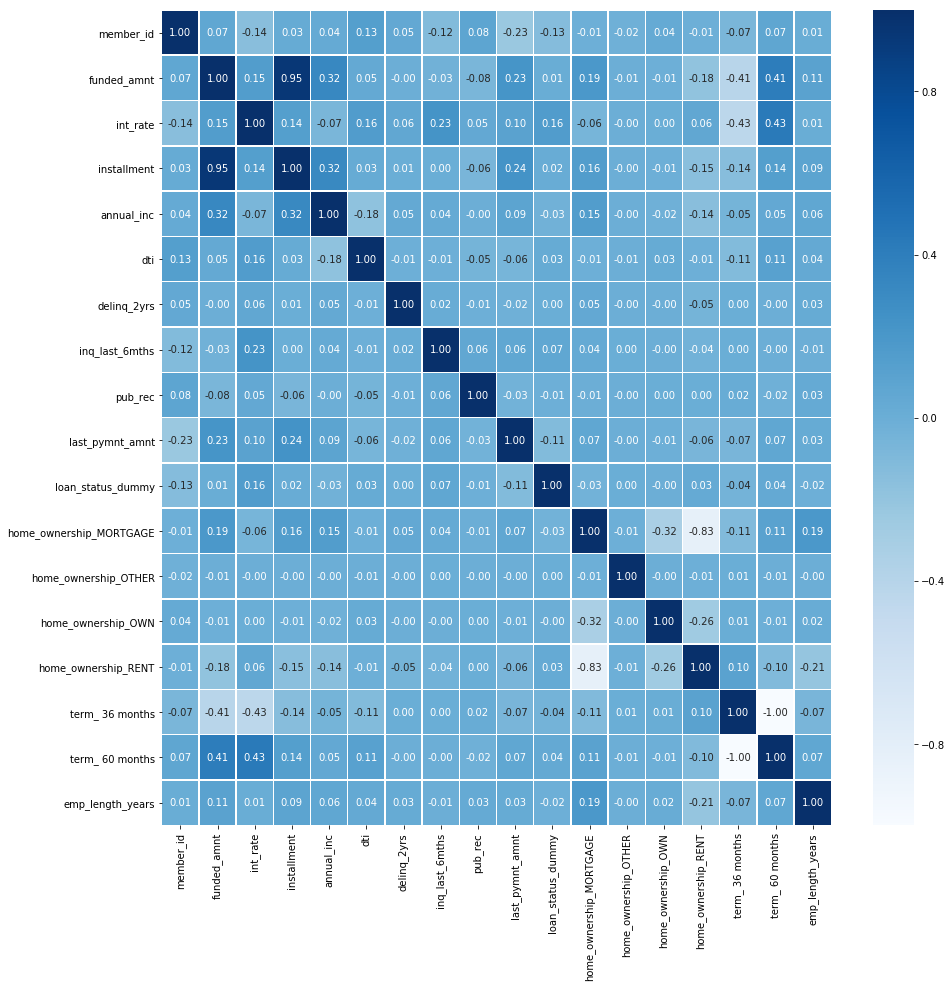

In [71]:
# heatmap 차트 그리기
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),annot=True, fmt='.2f',linewidths=.5, cmap='Blues')

### 변수 추가적으로 drop: (1) 다른 변수와 상관관계 지나치게 높은 경우, (2) 더미 변환 과정에서 미처 드랍하지 못한 변수 제거

In [72]:
data = data.drop(columns=['emp_length', 'loan_status', 'dti', 'installment', 'member_id'])

### Train/Test 구분하기

In [73]:
train, test = train_test_split(data, test_size=0.1, random_state=42)

In [74]:
train.describe()

,funded_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,pub_rec,last_pymnt_amnt,loan_status_dummy,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months,emp_length_years
count,755812.000000,755812.000000,7.558120e+05,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000,755812.000000
mean,14914.413968,13.241109,7.634578e+04,0.317493,0.685357,0.189088,2210.254038,0.084422,0.501893,0.000161,0.093839,0.404106,0.693626,0.306374,6.100254
std,8443.876651,4.387257,6.596771e+04,0.866202,0.967512,0.569947,4855.815487,0.278020,0.499997,0.012704,0.291605,0.490718,0.460987,0.460987,3.536282
min,500.000000,5.320000,3.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8350.000000,9.990000,4.700000e+04,0.000000,0.000000,0.000000,285.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,13200.000000,12.990000,6.500000e+04,0.000000,0.000000,0.000000,469.290000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
75%,20000.000000,16.200000,9.000000e+04,0.000000,1.000000,0.000000,843.900000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000
max,35000.000000,28.990000,9.500000e+06,39.000000,8.000000,63.000000,36475.590000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [75]:
test.describe()

,funded_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,pub_rec,last_pymnt_amnt,loan_status_dummy,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months,emp_length_years
count,83980.000000,83980.000000,8.398000e+04,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000,83980.000000
mean,14963.565432,13.251064,7.657659e+04,0.318481,0.682889,0.190557,2210.935861,0.083222,0.503179,0.000226,0.092593,0.404001,0.693701,0.306299,6.078090
std,8449.355608,4.413112,6.253504e+04,0.869029,0.963683,0.637126,4873.742500,0.276219,0.499993,0.015040,0.289864,0.490701,0.460958,0.460958,3.534831
min,750.000000,5.320000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8400.000000,9.990000,4.700000e+04,0.000000,0.000000,0.000000,287.177500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,13475.000000,12.990000,6.500000e+04,0.000000,0.000000,0.000000,470.655000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
75%,20000.000000,16.240000,9.074100e+04,0.000000,1.000000,0.000000,846.677500,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000
max,35000.000000,28.990000,7.141778e+06,22.000000,8.000000,86.000000,36133.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [76]:
test.to_csv('C:\\Users\\Yi Geunik\\lending-club-loan-data\\loan_cleaned.csv')

#### 종속 변수 체크

In [ ]:
# 종속변수 분포 
data['loan_status_dummy'].value_counts().plot(kind='bar')
plt.show()

### 10% 샘플링한 데이터로 분석 시작